In [1]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import os

In [81]:
results = seml.get_results('f_cpu_benchmark_accuracy', to_data_frame=True)

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

In [82]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [83]:
labels_dict = {}
labels_dict[1] = "moscot (r=1)"
labels_dict[5] = "moscot (r=5)"
labels_dict[10] = "moscot (r=10)"
labels_dict[50] = "moscot (r=50)"
labels_dict[100] = "moscot (r=100)"
labels_dict[1000] = "moscot (r=1000)"

In [84]:
results["x_value"] = [*map(labels_dict.get, results["config.rank"].values)]

In [85]:
res_1 = results[results["config.epsilon"]==0.5]
res_2 = results[results["config.epsilon"]==5]

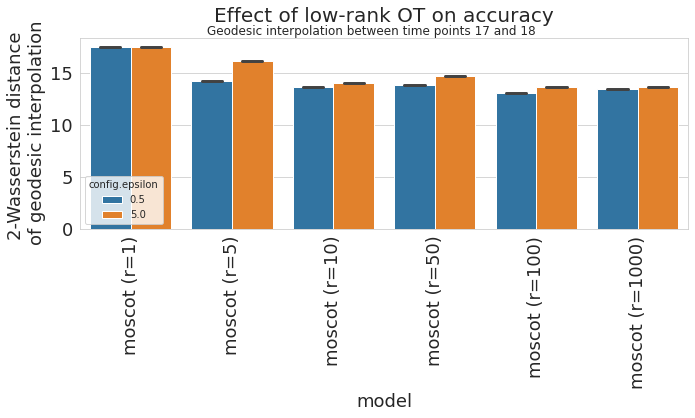

In [86]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.barplot(x="x_value", y="result", data=results, hue="config.epsilon", ci="sd", capsize=.2)


handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc=(1.05,0),
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('2-Wasserstein distance \nof geodesic interpolation', fontsize=18)
plt.xticks(rotation=90)
axs.set_xlabel('model', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Effect of low-rank OT on accuracy", fontsize=20, y=1.05)
axs.text(x=0.75, y=18.7, s="Geodesic interpolation between time points 17 and 18", fontsize=12)
_, xlabels = plt.xticks()
plt.tight_layout()
#plt.savefig(os.path.join("figures", "f_cpu_benchmark_accuracy.png"), dpi=300)


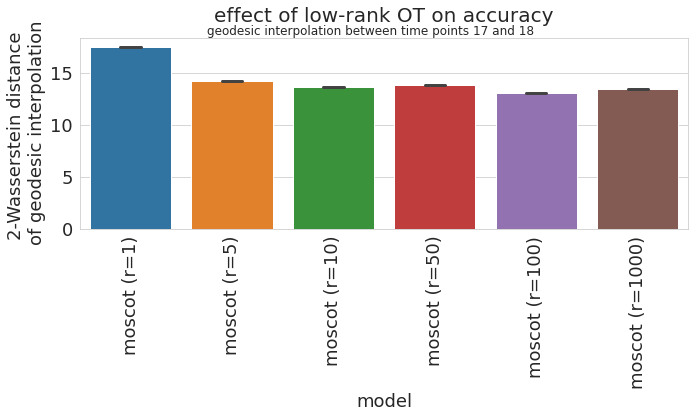

In [87]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.barplot(x="x_value", y="result", data=res_1, ci="sd", capsize=.2)


handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc=(1.05,0),
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('2-Wasserstein distance \nof geodesic interpolation', fontsize=18)
plt.xticks(rotation=90)
axs.set_xlabel('model', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("effect of low-rank OT on accuracy", fontsize=20, y=1.05)
axs.text(x=0.75, y=18.7, s="geodesic interpolation between time points 17 and 18", fontsize=12)
_, xlabels = plt.xticks()
plt.tight_layout()
plt.savefig(os.path.join("figures", "f_cpu_benchmark_accuracy.png"), dpi=300)

In [88]:
results_2 = seml.get_results('f_cpu_benchmark_accuracy_2', to_data_frame=True)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [89]:
r = results_2[results_2["config.epsilon"] == 0.5]
r#.set_index(["result.ot", "result.batches", "result.source_to_intermediate", "result.intermediate_to_target"])

,_id,config.overwrite,config.db_collection,config.config_hash,config.epsilon,config.gamma,config.lambda_1,config.lambda_2,config.max_iterations,config.rank,config.run,config.threshold,config.triple,config.seed,result.ot,result.random,result.random_with_growth,result.source_to_intermediate,result.intermediate_to_target,result.batches
0,21,21,f_cpu_benchmark_accuracy_2,1991e1652c4747c40e681213d7bfae79,0.5,0.1,1,50,100000,99,0,0.00001,"[17.0, 17.5, 18.0]",383264309,13.165542,17.532226,17.737655,14.011223,15.816925,15.665435
2,23,23,f_cpu_benchmark_accuracy_2,ed41b16222723374902b91ae3c947a64,0.5,0.1,1,50,100000,99,1,0.00001,"[17.0, 17.5, 18.0]",36460542,13.165542,17.532226,17.737655,14.011223,15.816925,15.665435
4,25,25,f_cpu_benchmark_accuracy_2,bf81333e72e560c8057e97ca870697f4,0.5,0.1,1,50,100000,99,2,0.00001,"[17.0, 17.5, 18.0]",533586161,13.165542,17.532226,17.737655,14.011223,15.816925,15.665435
6,27,27,f_cpu_benchmark_accuracy_2,11d9fd0572f96ce3745ea741b9eb51aa,0.5,0.1,1,50,100000,99,3,0.00001,"[17.0, 17.5, 18.0]",140741236,13.165542,17.532226,17.737655,14.011223,15.816925,15.665435
8,29,29,f_cpu_benchmark_accuracy_2,78703a65eeec8064ce97f59ec8902f9e,0.5,0.1,1,50,100000,99,4,0.00001,"[17.0, 17.5, 18.0]",223931680,13.165542,17.532226,17.737655,14.011223,15.816925,15.665435


In [90]:
for i in list(r.index):
    res_1 = res_1.append({"result": r.loc[i, "result.ot"], "x_value": "moscot (full, r=3678)"}, ignore_index=True)
    res_1 = res_1.append({"result": r.loc[i, "result.random"], "x_value": "random"}, ignore_index=True)
    res_1 = res_1.append({"result": r.loc[i, "result.batches"], "x_value": "batches"}, ignore_index=True)
    res_1 = res_1.append({"result": r.loc[i, "result.source_to_intermediate"], "x_value": "source to intermediate"}, ignore_index=True)
    res_1 = res_1.append({"result": r.loc[i, "result.intermediate_to_target"], "x_value": "intermediate to target"}, ignore_index=True)
    
    

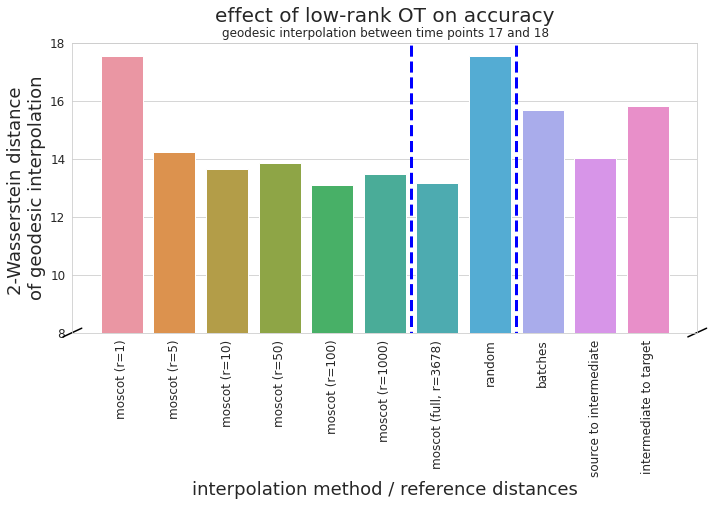

In [114]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),1.2*rows*(size+1)))
pl = sns.barplot(x="x_value", y="result", data=res_1)


handles, _labels = axs.get_legend_handles_labels()

labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=2, loc=(1.05,0),
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('2-Wasserstein distance \nof geodesic interpolation', fontsize=18)
plt.xticks(rotation=90)
axs.set_xlabel('interpolation method / reference distances', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=12)
axs.set_title("effect of low-rank OT on accuracy", fontsize=20, y=1.05)
axs.text(x=1.9, y=18.2, s="geodesic interpolation between time points 17 and 18", fontsize=12)
_, xlabels = plt.xticks()
plt.vlines(x = 5.5, ymin = 0, ymax = 18, color = 'blue', linewidth=3, linestyles="dashed")
plt.vlines(x = 7.5, ymin = 0, ymax = 18, color = 'blue', linewidth=3, linestyles="dashed")
pl.set(ylim=(8, 18))
d = .015
kwargs = dict(transform=axs.transAxes, color='k', clip_on=False)
axs.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axs.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
  
plt.tight_layout()
plt.savefig(os.path.join("figures", "f_cpu_benchmark_accuracy.png"), dpi=300)